In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import statsmodels.api as sm
#import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [162]:
df = pd.read_csv("players.csv")

In [163]:
df.sort_values(by='Value').tail(20)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
986,M. Cornet LM CF,25,76,77,West Ham United\n2022 ~ 2027,215798,"179cm / 5'10""",69kg / 152lbs,Left,77,...,12,9,2104,447,2,85,75,70,77,67
2189,D. Gazdag CAM CM,26,76,77,Philadelphia Union\n2021 ~ 2022,238277,"178cm / 5'10""",76kg / 168lbs,Right,77,...,11,11,1916,417,1,77,74,68,77,54
2267,M. Turner GK,28,77,79,Arsenal\n2022 ~ 2024,233267,"190cm / 6'3""",79kg / 174lbs,Right,77,...,79,77,1184,412,1,76,75,67,77,38
439,C. Bassey CB LB,22,74,82,Ajax\n2022 ~ 2027,241436,"185cm / 6'1""",76kg / 168lbs,Left,76,...,8,7,1874,413,1,83,44,62,66,73
418,C. Medina CM,20,74,83,Boca Juniors\n2020 ~ 2026,261082,"178cm / 5'10""",70kg / 154lbs,Right,76,...,6,6,1940,422,1,75,60,72,79,68
1566,T. Holeš CDM CB,29,77,77,Slavia Praha\n2019 ~ 2026,251116,"180cm / 5'11""",73kg / 161lbs,Right,77,...,13,5,2100,446,1,75,70,72,73,76
1783,S. Spierings CDM CM,26,76,79,Toulouse\n2020 ~ 2023,227622,"188cm / 6'2""",83kg / 183lbs,Right,77,...,14,14,1952,411,1,59,66,68,70,73
1114,Hugo Duro ST LM,22,75,81,Valencia\n2022 ~ 2026,243032,"180cm / 5'11""",76kg / 168lbs,Left,77,...,14,15,1870,397,1,74,74,66,72,44
200,Sergio Gómez LB,21,74,83,Manchester City\n2022 ~ 2026,241811,"171cm / 5'7""",68kg / 150lbs,Left,76,...,11,10,2061,425,1,70,70,74,77,69
416,L. Sučić CAM CM,19,74,85,Salzburg\n2019 ~ 2025,258775,"185cm / 6'1""",71kg / 157lbs,Left,76,...,11,7,1933,407,1,75,70,74,75,49


In [164]:
df.loc[527].values

array(['T. Pobega CM', 22, 76, 82, 'Milan\n2019 ~ 2027', 252060,
       '188cm / 6\'2"', '75kg / 165lbs', 'Left', 80, 'ST', 6, '€12M',
       '€45K', '€22.8M', 372, 72, 77, 77, 77, 69, 350, 75, 64, 62, 71, 78,
       389, 75, 77, 75, 79, 83, 393, 79, 74, 84, 78, 78, 355, 75, 72, 80,
       68, 60, 71, 224, 73, 76, 75, 50, 6, 10, 15, 13, 6, 2133, 454, 1,
       76, 77, 72, 76, 74], dtype=object)

In [165]:
df = df[df['Value']!=1000]

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 0 to 3119
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      3120 non-null   object
 1   Age                       3120 non-null   int64 
 2   Overall rating            3120 non-null   int64 
 3   Potential                 3120 non-null   int64 
 4   Team & Contract           3120 non-null   object
 5   ID                        3120 non-null   int64 
 6   Height                    3120 non-null   object
 7   Weight                    3120 non-null   object
 8   foot                      3120 non-null   object
 9   Best overall              3120 non-null   int64 
 10  Best position             3120 non-null   object
 11  Growth                    3120 non-null   int64 
 12  Value                     3120 non-null   object
 13  Wage                      3120 non-null   object
 14  Release clause          

In [167]:
df = pd.get_dummies(df,columns=['foot'],drop_first=True)

In [168]:
df.drop(['ID','Growth','Wage', 'Release clause','Crossing','Short passing','Volleys','Dribbling','Curve','FK Accuracy','Long passing','Acceleration','Sprint speed','Agility','Reactions','Balance','Jumping','Stamina','Long shots','Aggression','Interceptions','Penalties','Composure','Total defending','Marking','Standing tackle','Sliding tackle','Total goalkeeping','Base stats',
         'Best overall','Total attacking','Heading accuracy','Positioning','Vision','Strength','Total skill','Best position','Total stats', 'Team & Contract'
        
        
        
        
        
        
        
        ],axis=1,inplace=True)

In [169]:
df.sort_values(by='Value')

,name,Age,Overall rating,Potential,Height,Weight,Value,Finishing,Ball control,Total movement,...,GK Kicking,GK Positioning,GK Reflexes,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,foot_Right
393,A. Afif LW CF CAM,25,76,77,"176cm / 5'9""",70kg / 154lbs,€0,74,75,395,...,8,5,10,1,87,72,72,77,32,1
1432,T. Deng CB,25,65,67,"178cm / 5'10""",73kg / 161lbs,€0,26,57,343,...,9,8,14,1,77,42,49,55,65,1
3030,19 B. Méndez CB RB,18,72,82,"178cm / 5'10""",77kg / 170lbs,€0,25,48,334,...,13,13,10,1,65,27,45,45,72,1
2606,K. Muneer LW,24,64,67,"174cm / 5'9""",67kg / 148lbs,€0,63,67,394,...,6,5,15,1,83,59,53,69,30,1
994,Z. Kalmár CAM LM,27,74,75,"185cm / 6'1""",81kg / 179lbs,€0,68,74,340,...,12,15,6,1,65,73,73,73,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,S. Guirassy ST,26,76,77,"187cm / 6'2""",82kg / 181lbs,€9M,76,79,341,...,12,12,8,2,68,76,66,75,38,1
831,M. van Ewijk RB,21,74,82,"175cm / 5'9""",70kg / 154lbs,€9M,52,66,401,...,14,12,6,1,93,54,59,69,68,1
1428,A. Fulgini LW CM CAM,25,76,77,"182cm / 6'0""",77kg / 170lbs,€9M,73,81,358,...,11,15,14,2,73,70,76,79,69,1
2987,Manu Sánchez LB LWB LM,21,74,82,"171cm / 5'7""",66kg / 146lbs,€9M,42,71,358,...,10,12,6,1,74,44,62,69,72,0


In [170]:
corr_matrix = df.corr()
corr_matrix


/var/folders/92/hw_yvh2s6ml3hlsjb02h6g5w0000gn/T/ipykernel_15002/2331956095.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Age,Overall rating,Potential,Finishing,Ball control,Total movement,Total power,Shot power,Total mentality,GK Diving,...,GK Kicking,GK Positioning,GK Reflexes,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,foot_Right
Age,1.000000,0.568997,-0.193532,0.116679,0.138476,-0.020993,0.333017,0.350932,0.296425,0.151749,...,0.145571,0.162105,0.151618,0.577109,-0.137278,0.336585,0.466838,0.341449,0.218586,0.047133
Overall rating,0.568997,1.000000,0.576872,0.285093,0.426767,0.315130,0.553244,0.521646,0.504219,0.072130,...,0.075249,0.075887,0.075828,0.569660,0.207777,0.471060,0.728491,0.692662,0.343003,-0.012067
Potential,-0.193532,0.576872,1.000000,0.167613,0.297420,0.276569,0.231192,0.228546,0.236038,-0.000054,...,0.011254,-0.001733,0.006388,0.270619,0.255847,0.216675,0.384449,0.442225,0.157259,-0.040383
Finishing,0.116679,0.285093,0.167613,1.000000,0.764411,0.667281,0.679620,0.755453,0.649180,-0.547757,...,-0.535077,-0.542803,-0.542633,0.196311,0.267149,0.679853,0.359958,0.501190,-0.314017,-0.008985
Ball control,0.138476,0.426767,0.297420,0.764411,1.000000,0.731483,0.725565,0.586438,0.872109,-0.775114,...,-0.761234,-0.771190,-0.771602,0.243004,0.144413,0.260532,0.398999,0.429714,0.167158,-0.092229
Total movement,-0.020993,0.315130,0.276569,0.667281,0.731483,1.000000,0.519583,0.457301,0.596842,-0.548441,...,-0.535368,-0.547035,-0.540779,0.107262,0.676736,0.307511,0.322328,0.518454,-0.046583,-0.095193
Total power,0.333017,0.553244,0.231192,0.679620,0.725565,0.519583,1.000000,0.763241,0.800954,-0.510252,...,-0.505124,-0.504792,-0.507616,0.305376,0.125016,0.436786,0.389996,0.366012,0.219058,0.006191
Shot power,0.350932,0.521646,0.228546,0.755453,0.586438,0.457301,0.763241,1.000000,0.593381,-0.234431,...,-0.221408,-0.230768,-0.230163,0.361992,0.190182,0.788310,0.583401,0.609876,-0.124125,-0.012403
Total mentality,0.296425,0.504219,0.236038,0.649180,0.872109,0.596842,0.800954,0.593381,1.000000,-0.678305,...,-0.670342,-0.674611,-0.676025,0.316066,0.011031,0.243025,0.484967,0.368442,0.438878,-0.051192
GK Diving,0.151749,0.072130,-0.000054,-0.547757,-0.775114,-0.548441,-0.510252,-0.234431,-0.678305,1.000000,...,0.958914,0.962249,0.966845,0.056689,0.027896,0.192653,0.144501,0.151895,-0.152369,0.083569


In [171]:
selected_columns = ['name','Age','Dribbling / Reflexes', 'Passing / Kicking', 'Shooting / Handling', 'International reputation', 'Total mentality', 'Shot power', 'Total power', 'Ball control', 'Finishing','Value']
new_df = df[selected_columns].copy()

In [172]:
new_df

,name,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Value
0,J. Doku RM RW,20,81,67,67,3,270,74,339,76,70,€16.5M
1,O. Lingr CAM LM RM,23,77,70,74,1,354,75,388,76,75,€8.5M
2,22 M. Greenwood RM ST,19,80,73,81,1,316,85,367,78,83,€38M
3,T. Reijnders CM,23,77,74,71,1,345,76,381,76,69,€11.5M
4,C. Pulisic LW RW LM,23,84,73,71,3,295,76,337,83,73,€30M
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,Carlos Mendes Gomes LM LW,23,68,60,64,1,242,66,323,64,64,€1.5M
3116,J. von Moos RW ST,21,68,54,59,1,224,59,323,66,62,€1.2M
3117,Vitinho RB LB RM,22,74,64,45,1,294,67,332,70,33,€3.6M
3118,L. Ntumba GK,21,62,56,57,1,109,42,181,19,9,€525K


In [175]:
new_df['Value'] = new_df['Value'].astype(str)

In [177]:
new_df['Value'] = new_df['Value'].str.replace('€', '')

In [178]:
new_df

,name,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Value
0,J. Doku RM RW,20,81,67,67,3,270,74,339,76,70,16.5M
1,O. Lingr CAM LM RM,23,77,70,74,1,354,75,388,76,75,8.5M
2,22 M. Greenwood RM ST,19,80,73,81,1,316,85,367,78,83,38M
3,T. Reijnders CM,23,77,74,71,1,345,76,381,76,69,11.5M
4,C. Pulisic LW RW LM,23,84,73,71,3,295,76,337,83,73,30M
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,Carlos Mendes Gomes LM LW,23,68,60,64,1,242,66,323,64,64,1.5M
3116,J. von Moos RW ST,21,68,54,59,1,224,59,323,66,62,1.2M
3117,Vitinho RB LB RM,22,74,64,45,1,294,67,332,70,33,3.6M
3118,L. Ntumba GK,21,62,56,57,1,109,42,181,19,9,525K


In [179]:
column_data_type = new_df['Value'].dtype
print(column_data_type)

object


In [180]:
new_df['Value'] = new_df['Value'].astype(str)

In [182]:
def convert_value(value_str):
    if value_str.endswith('M'):
        return float(value_str.replace('M', '')) * 1000000
    elif value_str.endswith('K'):
        return float(value_str.replace('K', '')) * 1000
    else:
        return float(value_str)

In [183]:
new_df['Value'] = new_df['Value'].apply(convert_value)

In [184]:
new_df

,name,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Value
0,J. Doku RM RW,20,81,67,67,3,270,74,339,76,70,16500000.0
1,O. Lingr CAM LM RM,23,77,70,74,1,354,75,388,76,75,8500000.0
2,22 M. Greenwood RM ST,19,80,73,81,1,316,85,367,78,83,38000000.0
3,T. Reijnders CM,23,77,74,71,1,345,76,381,76,69,11500000.0
4,C. Pulisic LW RW LM,23,84,73,71,3,295,76,337,83,73,30000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,Carlos Mendes Gomes LM LW,23,68,60,64,1,242,66,323,64,64,1500000.0
3116,J. von Moos RW ST,21,68,54,59,1,224,59,323,66,62,1200000.0
3117,Vitinho RB LB RM,22,74,64,45,1,294,67,332,70,33,3600000.0
3118,L. Ntumba GK,21,62,56,57,1,109,42,181,19,9,525000.0


In [186]:
df1 = new_df.copy()

In [188]:
mask = new_df['Value'] > 0  # Create a boolean mask for non-zero values
df1['Value'] = np.log(new_df.loc[mask, 'Value'])  # Apply log only to non-zero values

In [189]:
df1 = df1.rename(columns={'Value':'Log Market Value'})

In [190]:
df1

,name,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Log Market Value
0,J. Doku RM RW,20,81,67,67,3,270,74,339,76,70,16.618871
1,O. Lingr CAM LM RM,23,77,70,74,1,354,75,388,76,75,15.955577
2,22 M. Greenwood RM ST,19,80,73,81,1,316,85,367,78,83,17.453097
3,T. Reijnders CM,23,77,74,71,1,345,76,381,76,69,16.257858
4,C. Pulisic LW RW LM,23,84,73,71,3,295,76,337,83,73,17.216708
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,Carlos Mendes Gomes LM LW,23,68,60,64,1,242,66,323,64,64,14.220976
3116,J. von Moos RW ST,21,68,54,59,1,224,59,323,66,62,13.997832
3117,Vitinho RB LB RM,22,74,64,45,1,294,67,332,70,33,15.096444
3118,L. Ntumba GK,21,62,56,57,1,109,42,181,19,9,13.171154


In [191]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

In [192]:
y = df1['Log Market Value']
X = df1.drop(['name','Log Market Value'],axis=1)

In [193]:
y

0       16.618871
1       15.955577
2       17.453097
3       16.257858
4       17.216708
          ...    
3115    14.220976
3116    13.997832
3117    15.096444
3118    13.171154
3119    16.883563
Name: Log Market Value, Length: 3120, dtype: float64

0      -0.117307
1      -0.403183
2       1.257608
3      -0.213318
4       0.236155
          ...   
3115   -0.453239
3116   -0.873457
3117   -1.168621
3118   -0.195368
3119    0.860126
Name: Log Market Value, Length: 3049, dtype: float64


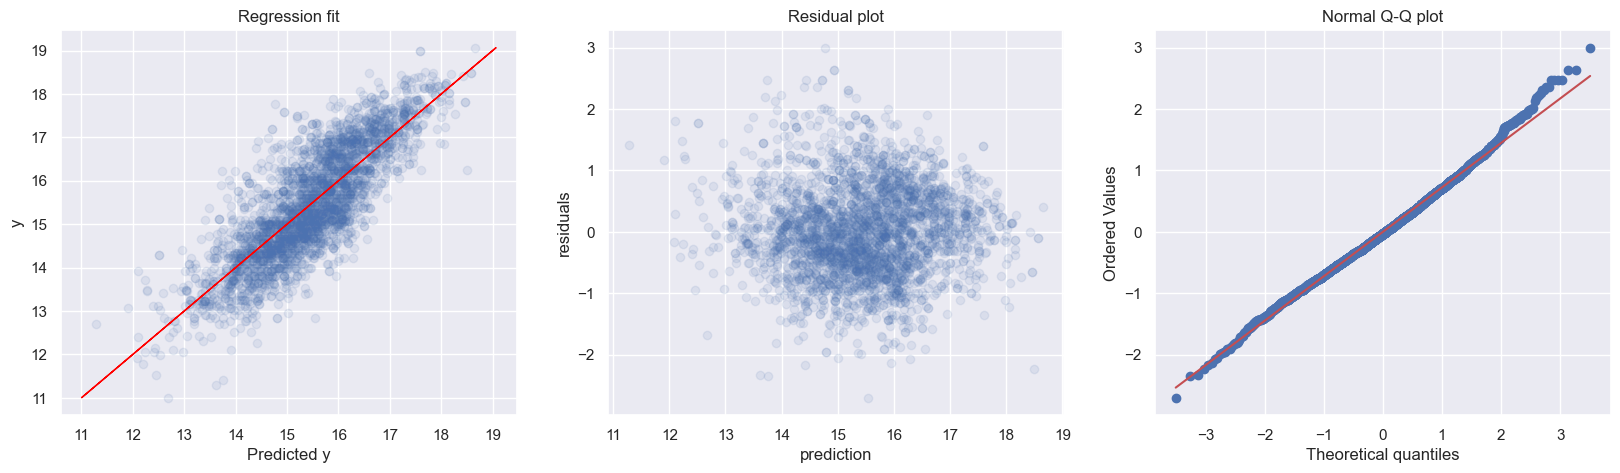

In [194]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Remove rows with missing values from X and y
combined_df = pd.concat([X, y], axis=1)
combined_df.dropna(inplace=True)

# Separate X and y after removing missing values
X = combined_df.iloc[:, :-1]
y = combined_df.iloc[:, -1]

# Use the diagnostic_plot() function with the updated X and y
sns.set(style='darkgrid')
diagnostic_plot(X, y)

In [195]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [196]:
selected_columns2 = ['Age','Dribbling / Reflexes', 'Passing / Kicking', 'Shooting / Handling', 'International reputation', 'Shot power', 'Total power', 'Ball control', 'Finishing']

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
df1.isna().sum()

name                         0
Age                          0
Dribbling / Reflexes         0
Passing / Kicking            0
Shooting / Handling          0
International reputation     0
Total mentality              0
Shot power                   0
Total power                  0
Ball control                 0
Finishing                    0
Log Market Value            71
dtype: int64

In [200]:
df1 = df1.dropna()

In [201]:
df1.isna().sum()

name                        0
Age                         0
Dribbling / Reflexes        0
Passing / Kicking           0
Shooting / Handling         0
International reputation    0
Total mentality             0
Shot power                  0
Total power                 0
Ball control                0
Finishing                   0
Log Market Value            0
dtype: int64

In [202]:
X_train = df1.drop(['name', 'Log Market Value'], axis=1)
y_train = df1['Log Market Value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [203]:
model = reg.fit(X,y)

In [204]:
model.intercept_

5.774323116460058

In [205]:
model.coef_

array([-0.05454543,  0.06540383,  0.01758388,  0.02369507,  0.33383665,
       -0.00042879, -0.02305917,  0.01543485,  0.03134691, -0.04006821])

In [206]:
reg.score(X_train, y_train)

0.6803418636587191

In [207]:
from sklearn.ensemble import RandomForestRegressor

In [208]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [209]:
forest.score(X_train, y_train)

0.9805347953022961

In [210]:
forest.predict(X_test)

array([15.27272848, 14.55578138, 14.99728714, 13.77714724, 13.91315198,
       16.84253667, 14.61054069, 13.90677135, 15.06981525, 16.28171953,
       15.14324375, 14.70906452, 15.75101841, 15.83034716, 14.67905926,
       15.51947432, 14.12644397, 14.59028985, 13.2825096 , 14.42529069,
       14.4235006 , 14.41171399, 16.06182904, 15.01457693, 16.70226731,
       17.59181799, 17.5813351 , 17.2617542 , 17.24370408, 15.44266506,
       14.11358406, 14.50326572, 14.5730999 , 14.40637314, 17.68169157,
       15.62668794, 16.09869338, 15.5923219 , 14.99775957, 14.26285497,
       16.36827427, 17.22032513, 15.42573299, 13.54646432, 15.43378429,
       16.87905731, 17.15383631, 13.26545227, 15.67888144, 16.32431013,
       13.91293085, 13.06046115, 16.65553213, 16.27971621, 16.79303246,
       15.95516084, 15.89707881, 16.28061568, 17.12482945, 13.11664761,
       14.46875131, 14.94031444, 14.31706579, 17.26627528, 17.39106477,
       14.11486381, 14.55264936, 13.88909044, 15.58406563, 13.47

In [211]:
np.array([y_test
         ])

array([[15.17648711, 14.07787482, 14.84512998, 14.07787482, 13.91082074,
        17.0736071 , 14.60396792, 13.76421726, 14.94691267, 16.16688582,
        15.20180492, 14.22097567, 15.60727003, 15.95557672, 14.73180129,
        15.52025865, 14.22097567, 14.5574479 , 13.38472764, 14.45736444,
        14.771022  , 14.34613881, 16.06680236, 15.0964444 , 16.88356349,
        17.67624027, 17.67624027, 17.05418901, 17.24949776, 15.42494847,
        14.34613881, 14.40329722, 14.73180129, 14.50865774, 17.67624027,
        15.68731273, 16.75994954, 15.52025865, 15.00943303, 14.22097567,
        16.58809928, 17.19990082, 15.25059508, 13.34550693, 15.2971151 ,
        16.88356349, 17.14771507, 13.26212532, 15.76142071, 16.25785759,
        13.71015004, 12.95984445, 16.67771144, 16.3412392 , 16.88356349,
        16.16688582, 16.01273514, 16.25785759, 17.35646988, 12.89921983,
        14.34613881, 15.00943303, 14.34613881, 17.12969656, 17.55318018,
        13.91082074, 14.40329722, 13.99783211, 15.6

In [212]:
X_test.head()

,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing
1550,19,74,64,44,1,286,50,265,73,39
2422,29,58,52,42,2,293,65,359,58,34
2005,22,68,65,57,1,323,65,363,68,55
347,17,59,59,60,1,221,57,316,57,63
2731,18,69,58,62,1,99,44,183,12,5


In [213]:
reg.predict(X_test)

array([15.6199393 , 14.93558805, 15.74253668, 14.22962134, 14.07151167,
       16.15864944, 14.23417372, 14.03628536, 16.50578748, 16.58634586,
       15.53194139, 16.1039407 , 15.7418965 , 14.25532947, 14.01595065,
       15.95253409, 13.88984093, 14.6131434 , 13.91130003, 14.94401634,
       16.32424813, 15.01632754, 15.31052592, 14.75708659, 15.91641615,
       17.29996466, 17.65282884, 17.29933055, 17.49165396, 14.91947236,
       14.10878753, 15.54671174, 14.94735905, 14.74502869, 17.72892883,
       15.70068915, 14.75078235, 16.07737048, 14.64180223, 13.85775692,
       16.61905345, 17.51807521, 14.68059948, 13.42077562, 15.77798007,
       15.78098138, 16.63006022, 13.10893639, 14.04229567, 16.6036453 ,
       14.99570359, 13.2564723 , 16.26190142, 15.853918  , 16.19821061,
       15.66225215, 15.62092753, 16.47117512, 16.97651671, 13.9596398 ,
       15.6117771 , 15.07444473, 14.43882467, 17.04195979, 16.84329555,
       14.22253886, 12.95329532, 15.16760145, 16.03191576, 13.79

In [214]:
y_test

1550    15.176487
2422    14.077875
2005    14.845130
347     14.077875
2731    13.910821
          ...    
862     17.553180
2363    16.118096
1443    14.771022
1394    14.946913
356     16.618871
Name: Log Market Value, Length: 610, dtype: float64

In [215]:
np.array([y_test])

array([[15.17648711, 14.07787482, 14.84512998, 14.07787482, 13.91082074,
        17.0736071 , 14.60396792, 13.76421726, 14.94691267, 16.16688582,
        15.20180492, 14.22097567, 15.60727003, 15.95557672, 14.73180129,
        15.52025865, 14.22097567, 14.5574479 , 13.38472764, 14.45736444,
        14.771022  , 14.34613881, 16.06680236, 15.0964444 , 16.88356349,
        17.67624027, 17.67624027, 17.05418901, 17.24949776, 15.42494847,
        14.34613881, 14.40329722, 14.73180129, 14.50865774, 17.67624027,
        15.68731273, 16.75994954, 15.52025865, 15.00943303, 14.22097567,
        16.58809928, 17.19990082, 15.25059508, 13.34550693, 15.2971151 ,
        16.88356349, 17.14771507, 13.26212532, 15.76142071, 16.25785759,
        13.71015004, 12.95984445, 16.67771144, 16.3412392 , 16.88356349,
        16.16688582, 16.01273514, 16.25785759, 17.35646988, 12.89921983,
        14.34613881, 15.00943303, 14.34613881, 17.12969656, 17.55318018,
        13.91082074, 14.40329722, 13.99783211, 15.6

In [216]:
# Assuming you have trained your model and obtained predictions on the testing dataset
predictions_forest = forest.predict(X_test)
predictions_reg = reg.predict(X_test)
# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value (Random Forest)': predictions_forest,
                           'Predicted Market Value (Linear Regression)': predictions_reg,
                           'Actual Market Value': y_test})

In [217]:
results_df

,Predicted Market Value (Random Forest),Predicted Market Value (Linear Regression),Actual Market Value
1550,15.272728,15.619939,15.176487
2422,14.555781,14.935588,14.077875
2005,14.997287,15.742537,14.845130
347,13.777147,14.229621,14.077875
2731,13.913152,14.071512,13.910821
...,...,...,...
862,17.548361,17.248435,17.553180
2363,15.653986,14.989628,16.118096
1443,15.165034,15.825095,14.771022
1394,15.130740,15.992584,14.946913


In [218]:
X_train = df1.drop(['name', 'Log Market Value'], axis=1)
y_train = df1['Log Market Value']
forest.fit(X_train, y_train)

RandomForestRegressor()

In [219]:
forest.score(X_train, y_train)

0.97976043094235

In [220]:
forest.predict(X_train)

array([16.55959278, 15.98766135, 17.30789377, ..., 15.2984127 ,
       13.17351978, 16.89107037])

In [221]:
predictions_forest_train = forest.predict(X_train)

results_df_train = pd.DataFrame({'Predicted Market Value (Random Forest)': predictions_forest_train,
                        
                           'Actual Market Value': y_train})

In [222]:
results_df_train

,Predicted Market Value (Random Forest),Actual Market Value
0,16.559593,16.618871
1,15.987661,15.955577
2,17.307894,17.453097
3,16.234487,16.257858
4,17.206585,17.216708
...,...,...
3115,14.134138,14.220976
3116,14.064282,13.997832
3117,15.298413,15.096444
3118,13.173520,13.171154


In [223]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Perform cross-validation
rf_score = cross_val_score(rf, X, y, cv=10, scoring='r2').mean()

In [224]:
rf_score

0.7246417660331193

In [225]:
rf.fit(X,y)

RandomForestRegressor()

In [226]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training features
# y_train: Training labels
# X_val: Validation features
# y_val: Validation labels

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Access the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_val, y_val)
print("Best Model Score:", best_model_score)

# Make predictions using the best model
predictions = best_model.predict(X_test)

Best Model Score: 0.8539244670948045


In [228]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the predictions using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.22233188757989397


In [229]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the predictions using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the predictions using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.22233188757989397
R^2 Score: 0.8539244670948045


In [230]:
import pandas as pd

# Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Real Market Values': y_test, 'Predicted Market Values': y_pred})
print(results)

      Real Market Values  Predicted Market Values
1550           15.176487                15.413476
2422           14.077875                15.255062
2005           14.845130                15.489439
347            14.077875                13.427862
2731           13.910821                14.070879
...                  ...                      ...
862            17.553180                17.601801
2363           16.118096                15.117200
1443           14.771022                16.033076
1394           14.946913                15.551737
356            16.618871                16.050321

[610 rows x 2 columns]


In [231]:
print(results.head(10))  # Print the first 10 rows

      Real Market Values  Predicted Market Values
1550           15.176487                15.413476
2422           14.077875                15.255062
2005           14.845130                15.489439
347            14.077875                13.427862
2731           13.910821                14.070879
1198           17.073607                16.575230
2744           14.603968                14.597122
1049           13.764217                14.202402
2132           14.946913                15.421289
1474           16.166886                16.533863


In [232]:
index_value = 1000
feature_values = df1.loc[index_value]

for column_name, value in feature_values.iteritems():
    print(f"{column_name}: {value}")

name: B. Godfrey CB LB
Age: 24
Dribbling / Reflexes: 65
Passing / Kicking: 60
Shooting / Handling: 44
International reputation: 2
Total mentality: 298
Shot power: 53
Total power: 340
Ball control: 68
Finishing: 35
Log Market Value: 15.687312734865866


/var/folders/92/hw_yvh2s6ml3hlsjb02h6g5w0000gn/T/ipykernel_15002/1204220465.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, value in feature_values.iteritems():


In [233]:
input_features = [
    {'Ball control': 68, 
     'Dribbling / Reflexes': 65, 
     'Total power': 340,
    'Shooting / Handling': 44, 
     'Age': 24, 
     'Total mentality': 298,
    'Finishing': 35, 
     'Passing / Kicking': 60, 
     'Shot power': 53, 
     'International reputation': 2}
]

In [234]:
input_data = pd.DataFrame(input_features)


input_array = input_data.values

predictions = best_model.predict(input_array)
print(f"predicted market value is {predictions}")

predicted market value is [14.36839467]


/Users/rahmanmerchant/opt/anaconda3/envs/venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
